In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

df = pd.read_csv('data/Cleaned Data.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
X = df.drop('Survived', axis=1)
y = df[['Survived']]

X = X.iloc[:, :].values
y = y.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
model = LogisticRegression()

In [86]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [87]:
y_pred = model.predict(X_test)

In [88]:
confusion_matrix(y_test, y_pred)

array([[91, 14],
       [21, 53]])

In [91]:
model.score(X_train, y_train)

0.8075842696629213

[<matplotlib.text.Text at 0x114ea2908>, <matplotlib.text.Text at 0x113ee7320>]

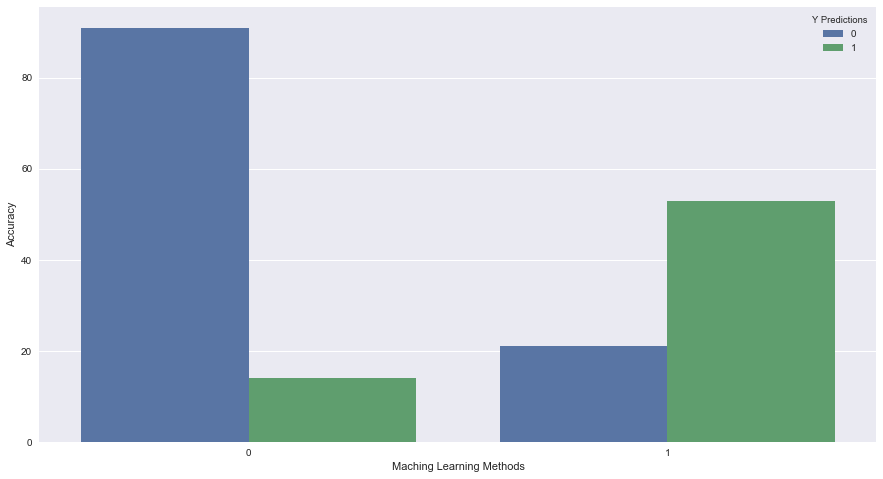

In [108]:
results = pd.DataFrame()
results['Y Test'] = y_test
results['Y Predictions'] = y_pred

fig = plt.figure(figsize=(15,8))
fig = sns.countplot(x=results['Y Test'], hue=results['Y Predictions'])
fig.set(ylabel="Accuracy", xlabel="Maching Learning Methods")